<a href="https://colab.research.google.com/github/kimdesok/Statistical-Thinking-in-Python-Part-1-/blob/main/Stats_by_Python2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Quantitative Exploratory Data Analysis


> * Mean is good for estimating the average but heavily influenced by outliers.
> * Median could be better in that case.
>> - Median is 50% percentile.

In [29]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

#Importing numpy
import numpy as np


# Set default Seaborn style
sns.set()

#Datasets
#Iris dataset consists of 150 rows and four columns.
#This data set consists of three different types of irise : Setosa, Versicolor, and Virginica.
#The first 50 rows represent data of Setoda and so on.
#source: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py
#Each column represents Sepal Length, Sepal Width, Petal Length and Petal Width.

#To extract Versicolor's petal length & width data
from sklearn.datasets import load_iris
versicolor_petal_length = load_iris().data[50:100,2]
versicolor_petal_width = load_iris().data[50:100,3]

In [17]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


In [18]:
#percentiles
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


#Percentile calculation and marking on the ecdf graph


In [19]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

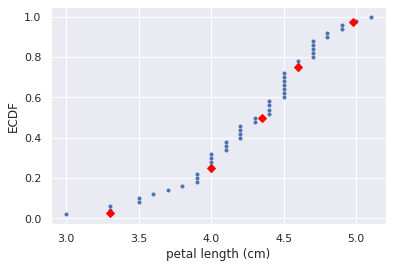

In [21]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_ = plt.plot(x_vers, y_vers,marker = '.', linestyle = 'none')

# Label the axes

plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Display the plot
plt.show()



#Box plot 
>* invented by Tukey and provided by Seaborn
>* good to represent non-Gaussian distribution with percentiles and outliers


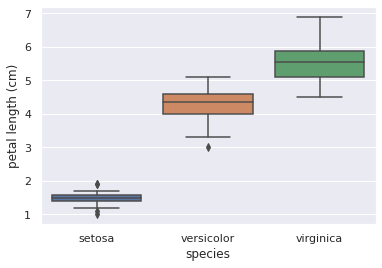

In [25]:
import pandas as pd 
df = pd.DataFrame(load_iris().data)
df.columns = ['sepal length (cm)',  'sepal width (cm)',  'petal length (cm)',  'petal width (cm)']
df_ = 50*['setosa']
df_[50:100] = 50*['versicolor']
df_[100:150] = 50*['virginica']
#print(len(df_))
df['species'] = df_

# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='species', y='petal length (cm)', data = df )



# Label the axes
plt.xlabel('species')
plt.ylabel('petal length (cm)')

# Show the plot
plt.show()



/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


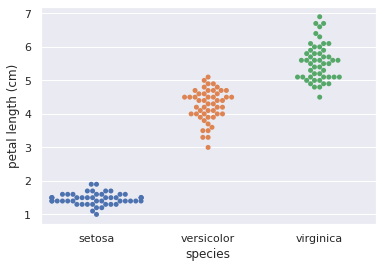

In [23]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='species', y='petal length (cm)', data=df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

In [26]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results

print(variance_explicit, variance_np)

0.21640000000000004 0.21640000000000004


In [ ]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))



#Covariance and correlation(Pearson's)

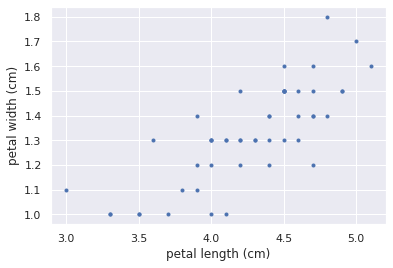

In [30]:
# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.' , linestyle='none' )

# Label the axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('petal width (cm)')

# Show the result

plt.show()

In [31]:
# Compute the covariance matrix: covariance_matrix 
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix [0,1]

# Print the length/width covariance
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


#Pearson's correlation coefficient

In [32]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)
    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169
